In [22]:
##Noise Signal
import numpy as np
import matplotlib.pyplot as plt
from random import random, sample, choice
from math import floor
from tqdm import tqdm
from numpy import array, dot, mean
from numpy.linalg import pinv
from sys import exit

noise_scale=100
number_of_samples=50

X = 25*(np.random.rand(number_of_samples,1)-.8)
Y = 5*X + 20*X**2 + X**3 + noise_scale*np.random.randn(number_of_samples,1)

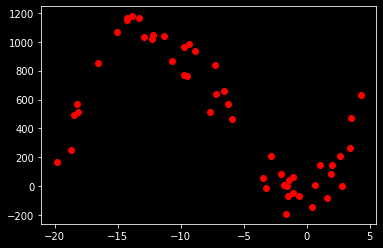

In [23]:
plt.style.use(['dark_background'])
plt.plot(X,Y,'ro')

In [24]:
flatx=X.flatten()
flaty=Y.flatten()

m = []
a = 1


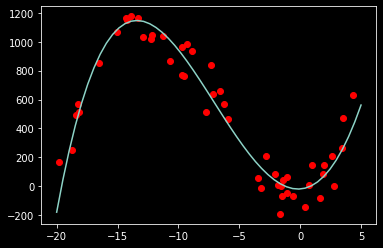

In [36]:
while a < 9:
  m.append(np.poly1d(np.polyfit(flatx,flaty,a)))
  a+=1

plt.plot(X, Y, 'ro') 
range = np.linspace(-20, 5, 50) 
plt.plot(range, m[3](range)) 

In [27]:
def multiple_linear_regression(inputs, outputs):
    X, Y = array(inputs), array(outputs)
    X_t, Y_t = X.transpose(), Y.transpose()
    coeff = dot((pinv((dot(X_t, X)))), (dot(X_t, Y)))
    Y_p = dot(X, coeff)
    Y_mean = mean(Y)
    SST = array([(i - Y_mean) ** 2 for i in Y]).sum()
    SSR = array([(i - j) ** 2 for i, j in zip(Y, Y_p)]).sum()
    COD = (1 - (SSR / SST)) * 100.0
    av_error = (SSR / len(Y))
    return {'COD': COD, 'coeff': coeff, 'error': av_error}

In [60]:
def check_termination_condition(best_individual):
    if ((best_individual['COD'] >= 99.0)
            or (generation_count == max_generations)):
        return True
    else:
        return False

In [72]:
def create_individual(individual_size):
      for i in range(len(individual_size)):
          return random()
  
def create_population(individual_size, population_size):
  for i in range(len(population_size)):
    return create_individual(individual_size)

In [30]:
def get_fitness(individual, inputs):
    predicted_outputs = dot(array(inputs), array(individual))
    output_mean = mean(outputs)
    SST = array(
        [(i - output_mean) ** 2 for i in outputs]).sum()
    SSR = array(
        [(i - j) ** 2 for i, j in zip(outputs, predicted_outputs)]).sum()
    COD = (1 - (SSR / SST)) * 100.0
    av_error = (SSR / len(outputs))
    return {'COD': COD, 'error': av_error, 'coeff': individual}

In [31]:
def evaluate_population(population):
    fitness_list = [get_fitness(individual, inputs)
                    for individual in tqdm(population)]
    error_list = sorted(fitness_list, key=lambda i: i['error'])
    best_individuals = error_list[: selection_size]
    best_individuals_stash.append(best_individuals[0]['coeff'])
    print('Error: ', best_individuals[0]['error'],
          'COD: ', best_individuals[0]['COD'])
    return best_individuals

In [32]:
def crossover(parent_1, parent_2):
    child = {}
    loci = [i for i in range(0, individual_size)]
    loci_1 = sample(loci, floor(0.5*(individual_size)))
    loci_2 = [i for i in loci if i not in loci_1]
    chromosome_1 = [[i, parent_1['coeff'][i]] for i in loci_1]
    chromosome_2 = [[i, parent_2['coeff'][i]] for i in loci_2]
    child.update({key: value for (key, value) in chromosome_1})
    child.update({key: value for (key, value) in chromosome_2})
    return [child[i] for i in loci]

In [37]:
def mutate(individual):
    loci = [i for i in range(0, individual_size)]
    no_of_genes_mutated = floor(probability_of_gene_mutating*individual_size)
    loci_to_mutate = sample(loci, no_of_genes_mutated)
    for locus in loci_to_mutate:
        gene_transform = choice([-1, 1])
        change = gene_transform*random()
        individual[locus] = individual[locus] + change
    return individual

In [38]:
def get_new_generation(selected_individuals):
    parent_pairs = [sample(selected_individuals, 2)
                    for i in range(population_size)]
    offspring = [crossover(pair[0], pair[1]) for pair in parent_pairs]
    offspring_indices = [i for i in range(population_size)]
    offspring_to_mutate = sample(
        offspring_indices,
        floor(probability_of_individual_mutating*population_size)
    )
    mutated_offspring = [[i, mutate(offspring[i])]
                         for i in offspring_to_mutate]
    for child in mutated_offspring:
        offspring[child[0]] = child[1]
    return offspring

In [39]:
inputs = X
outputs = Y


In [44]:
individual_size = len(inputs[0])
population_size = 1000
selection_size = floor(0.1*population_size)
max_generations = 50
probability_of_individual_mutating = 0.1
probability_of_gene_mutating = 0.25


In [56]:
random()

0.04620685103483135

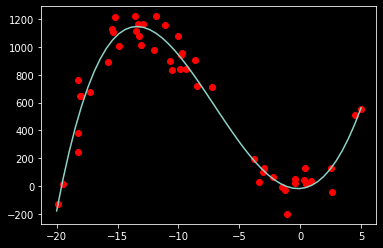

In [74]:
plt.plot(x, y ,'ro')

range = np.linspace(-20, 5, 50) # sets 50 pts evenly spaced between -20 and 5
plt.plot(range, m[3](range)) # plots 50 pts and uses m6 as the function (of the point)

In [73]:
initial_population = create_population(individual_size, 1000)
current_population = initial_population
termination = False
generation_count = 0

while termination is False:
    current_best_individual = get_fitness(best_individuals_stash[-1], inputs)
    print('Generation: ', generation_count)
    best_individuals = evaluate_population(current_population)
    current_population = get_new_generation(best_individuals)
    termination = check_termination_condition(current_best_individual)
    generation_count += 1
else:
    print(get_fitness(best_individuals_stash[-1], inputs))

TypeError: ignored